In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255
y_test_proc.shape

(10000, 100)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [ ]:
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(32, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x=layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)

outputs = layers.Dense(100, activation='softmax')(x)


vgg_net_model = keras.Model(inputs, outputs)

In [ ]:
vgg_net_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)       

In [ ]:
%load_ext tensorboard
tensor_board = tf.keras.callbacks.TensorBoard(log_dir='tensorboard',histogram_freq=1)
vgg_net_model.compile(optimizer=keras.optimizers.Adam(lr=0.0001,clipvalue=0.7,clipnorm=0.7),
              loss='categorical_crossentropy',
              metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='vgg_adam_batchnorm.hdf5',
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
# vgg_net_model.fit(x_train,y_proc,batch_size=200,validation_data=(x_test,y_test_proc),epochs=50,callbacks=[callback,model_checkpoint_callback])
output=vgg_net_model.fit_generator(datagen.flow(x_train,y_proc,batch_size = 200), epochs = 100, validation_data = (x_test,y_test_proc),callbacks = [tensor_board,callback,model_checkpoint_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
250/250 [==============================] - 26s 106ms/step - loss: 4.2157 - acc: 0.0716 - val_loss: 4.8857 - val_acc: 0.0100
Epoch 2/100
250/250 [==============================] - 26s 104ms/step - loss: 3.8143 - acc: 0.1215 - val_loss: 4.3406 - val_acc: 0.0589
Epoch 3/100
250/250 [==============================] - 26s 106ms/step - loss: 3.6165 - acc: 0.1533 - val_loss: 3.6005 - val_acc: 0.1567
Epoch 4/100
250/250 [==============================] - 27s 106ms/step - loss: 3.4923 - acc: 0.1736 - val_loss: 3.5097 - val_acc: 0.1706
Epoch 5/100
250/250 [==============================] - 27s 106ms/step - loss: 3.3886 - acc: 0.1909 - val_loss: 3.6534 - val_acc: 0.1557
Epoch 6/100
250/250 [==============================] - 26s 106ms/step - loss: 3.2955 - acc: 0.2039 - val_loss: 3.5674 - val_acc: 0.1747
Epoch 7/100
250/250 [==============================] - 26s 105ms/step - loss: 3.2268 - acc: 0.

In [ ]:

y_pred=vgg_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

Precision: 0.3975223784381574
Recall: 0.351
Accuracy: 0.351


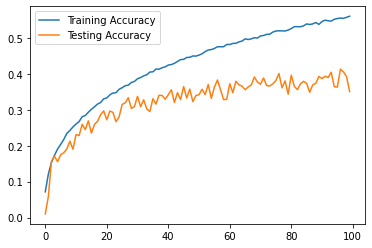

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])


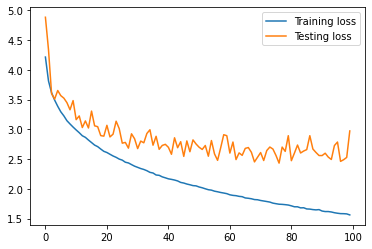

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.legend(['Training loss','Testing loss'])

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255
y_test_proc.shape

inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(32, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x=layers.BatchNormalization()(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x=layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)

outputs = layers.Dense(100, activation='softmax')(x)


vgg_net_model = keras.Model(inputs, outputs)

vgg_net_model.load_weights('../weights/vgg_adam_batchnorm.hdf5')


y_pred=vgg_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

169009152/169001437 [==============================] - 4s 0us/step
Precision: 0.43013235578277237
Recall: 0.4136
Accuracy: 0.4136
